## London City Environment Analysis

### Introduction


- This Jupyter Notebook presents an analysis of environmental data from the City of London. The dataset contains various parameters related to energy performance certificates, building characteristics, and environmental impact. The analysis aims to explore trends, relationships, and predictive models to gain insights into London's environmental profile.

- Your analysis should uncover
- -insights into energy efficiency, carbon emissions, and the potential for improvements
- -within the building stock of the area.

- Installation and importing of the data

In [79]:
!pip install scikit-learn

     |████████████████████████████████| 11.1 MB 548 kB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 528 kB/s eta 0:00:01


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print("The necessary libraries are successfully imported")

The necessary libraries are successfully imported


# Step 1- Data Preprocessing
- Reading the data from the csv files.

In [3]:
certificate = pd.read_csv('data/certificates.csv', dtype='unicode')
recommendations = pd.read_csv('data/recommendations.csv')

In [4]:
data_certificate = pd.DataFrame(certificate)
data_recommendations = pd.DataFrame(recommendations)

# Data Preprocessing
- Analyzing the data and its structure

In [5]:
#The overall columns of data of certifications
data_certificate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LMK_KEY                        8229 non-null   object
 1   ADDRESS1                       8229 non-null   object
 2   ADDRESS2                       7885 non-null   object
 3   ADDRESS3                       1607 non-null   object
 4   POSTCODE                       8229 non-null   object
 5   BUILDING_REFERENCE_NUMBER      8229 non-null   object
 6   CURRENT_ENERGY_RATING          8229 non-null   object
 7   POTENTIAL_ENERGY_RATING        8229 non-null   object
 8   CURRENT_ENERGY_EFFICIENCY      8229 non-null   object
 9   POTENTIAL_ENERGY_EFFICIENCY    8229 non-null   object
 10  PROPERTY_TYPE                  8229 non-null   object
 11  BUILT_FORM                     8229 non-null   object
 12  INSPECTION_DATE                8229 non-null   object
 13  LOC

- Displaying a sample Data

In [6]:
data_recommendations.head(1)

,LMK_KEY,IMPROVEMENT_ITEM,IMPROVEMENT_SUMMARY_TEXT,IMPROVEMENT_DESCR_TEXT,IMPROVEMENT_ID,IMPROVEMENT_ID_TEXT,INDICATIVE_COST
0,374026612142020071911295861809638,1,NaN,NaN,62.0,NaN,"£800 - £1,200"


- Showing the total shape (length and width of the data)

In [7]:
print(f'1.The shape(row and column) of the certification data is {data_certificate.shape}\n2.The shape(row and column) of the recommendations data is {data_recommendations.shape}')

1.The shape(row and column) of the certification data is (8229, 92)
2.The shape(row and column) of the recommendations data is (12481, 7)


- Describe Function
- Generate descriptive statistics.
- This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [8]:
data_recommendations.describe()

,IMPROVEMENT_ITEM,IMPROVEMENT_ID,IMPROVEMENT_ID_TEXT
count,12481.000000,10482.000000,0.0
mean,1.876612,27.464224,NaN
std,1.062396,18.615993,NaN
min,1.000000,1.000000,NaN
25%,1.000000,8.000000,NaN
50%,2.000000,35.000000,NaN
75%,2.000000,35.000000,NaN
max,9.000000,63.000000,NaN


#### Checking for any null data in the dataframe

In [9]:
data_certificate.isnull().sum()

LMK_KEY                            0
ADDRESS1                           0
ADDRESS2                         344
ADDRESS3                        6622
POSTCODE                           0
                                ... 
TENURE                           144
FIXED_LIGHTING_OUTLETS_COUNT    3303
LOW_ENERGY_FIXED_LIGHT_COUNT    4852
UPRN                             950
UPRN_SOURCE                      950
Length: 92, dtype: int64

#### Removing the null values from the dataframe

In [10]:
data_certificate.fillna('', inplace=True)

- Checking if the null values are still present in the Dataframe

In [11]:
#Here we can see that all the empty data is handled with the string value
data_certificate.isnull().sum()

LMK_KEY                         0
ADDRESS1                        0
ADDRESS2                        0
ADDRESS3                        0
POSTCODE                        0
                               ..
TENURE                          0
FIXED_LIGHTING_OUTLETS_COUNT    0
LOW_ENERGY_FIXED_LIGHT_COUNT    0
UPRN                            0
UPRN_SOURCE                     0
Length: 92, dtype: int64

#### - Combining the All three address field to Single address field.

In [12]:
data_certificate['Full-Address'] = data_certificate['ADDRESS1'] + " " + data_certificate['ADDRESS2'] + " " + data_certificate['ADDRESS3']
data_certificate['Full-Address'].reset_index()

,index,Full-Address
0,0,Flat 5 53 Fleet Street
1,1,"Flat 310 1, Pepys Street"
2,2,Flat 4 Evangelist House 33 Blackfriars Lane
3,3,"Flat 605 Queens Quay 58, Upper Thames Street"
4,4,"Apartment 99 Globe View 10, High Timber Street"
...,...,...
8224,8224,"Flat 9, 4-7 Lombard lane"
8225,8225,13b Petticoat Tower Petticoat Square
8226,8226,Flat C4 Calico House 42 Bow Lane
8227,8227,Flat B1 Calico House 42 Bow Lane


#### Now the address data is combined together, we can drop Address columns

In [120]:
#dropping the address columns after combining them together
data_certificate.drop(['ADDRESS1', 'ADDRESS2', 'ADDRESS3'], axis=1, inplace=True)
data_certificate.head(1).reset_index()

,index,LMK_KEY,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,...,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,Full-Address,C02_EMISSIONS_CURRENT
0,0,1487525379842016101211455442769828,EC4Y 1BE,0813977478,C,C,80,80,Flat,NO DATA!,...,LONDON,NO DATA!,2016-10-12 11:45:54,owner-occupied,15,15,,,Flat 5 53 Fleet Street,2.7


- Here removing the columns where the valus are NA

In [14]:
data_certificate.dropna(axis=1, inplace=True)
#Checking the shape after removing
data_certificate.shape

(8229, 90)

- removing the unnecessary columns from the data

In [17]:
data_certificate.drop(['LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY', 'FLAT_TOP_STOREY','EXTENSION_COUNT', 'NUMBER_OPEN_FIREPLACES', 'ROOF_ENERGY_EFF', 'WIND_TURBINE_COUNT','WATER_HEATING_FLAG','FIXED_LIGHTING_OUTLETS_COUNT'], axis=1, inplace=True)
print("Dropped unnecessary data")

Dropped unnecessary data


#### Checking if there is any duplicate data in our dataframe

In [18]:
# Duplicated data
df_duplicated=data_certificate[data_certificate.duplicated() == True]
df_duplicated

,LMK_KEY,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,...,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,Full-Address


In [19]:
data_certificate['PROPERTY_TYPE'].unique()
data_certificate['C02_EMISSIONS_CURRENT'] = data_certificate['CO2_EMISSIONS_CURRENT'].astype(float)

# Exploratory Data Analysis:

#### Total CO2 emission per Property type

In [20]:
#group by the data based on the property type and carbon emission
property_type = data_certificate.groupby('PROPERTY_TYPE').sum().reset_index()
property_type.sort_values(ascending=False, by='C02_EMISSIONS_CURRENT')

,PROPERTY_TYPE,LMK_KEY,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,BUILT_FORM,INSPECTION_DATE,...,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,Full-Address,C02_EMISSIONS_CURRENT
1,Flat,1487525379842016101211455442769828374026612142...,EC4Y 1BEEC3N 2NUEC4V 3EHEC4V 3PSEC1A 7BDEC4M 9...,0813977478316181866850085885686155515568993897...,CCFCBBCBDBCDDDBCEBCCDCDECCEDCDDCBCBDCBDEEDCCBB...,CBCCBBCBDBCDCBBCEBBCDCDDCCDCCCDBBBBDCBDDCBCCBB...,8080367085857784618278596867827239817675597168...,8082787485857984618279617082827440818776597268...,NO DATA!Mid-TerraceMid-TerraceEnclosed Mid-Ter...,2016-10-122020-07-172019-07-092008-12-082018-0...,...,LONDONLONDONLONDONLONDONLONDONLONDONLONDONLOND...,NO DATA!England and Wales: 2003-2006England an...,2016-10-12 11:45:542020-07-19 11:29:582019-07-...,owner-occupiedrental (private)rental (private)...,1515272252098832025425114875147610119203518106...,1515212252008320151504435161182004186220302020...,9550061820000006922020000007053095514784100020...,Address MatchedAddress MatchedAddress MatchedA...,"Flat 5 53 Fleet Street Flat 310 1, Pepys Stree...",17292.7
3,Maisonette,2456477802220090320154544396086912346856342120...,EC4V 6EPEC2Y 8BLEC1A 7LSEC1Y 0RBEC2Y 8DHEC3N 1...,9312849568966245856803867315788371641178102073...,CEDDECDBBDECDDEDCFDGDDCEDDDCDCCEEDDCBBCDCEFGGC...,CEDCECDBBCDBDCECCFDGDCCCDDDBCCCDCCCCBBBCCEFGGC...,6944666343776486856052745766516475326666167714...,8046667444776686857563835776547977336666469737...,Enclosed End-TerraceEnclosed End-TerraceMid-Te...,2009-03-202009-03-042017-04-242013-07-192008-1...,...,LONDONLONDONLONDONLONDONLONDONLONDONLONDONLOND...,England and Wales: 1996-2002England and Wales:...,2009-03-20 15:45:442009-03-05 06:45:512017-04-...,rental (private)rental (private)unknownrental ...,9231210611914155129149121095121494128892098129...,9512069131265031359012322041272162011226611212...,9550053820000007452295514334200000071679200000...,Address MatchedAddress MatchedAddress MatchedA...,Flat 4 Evangelist House 33 Blackfriars LaneFla...,1053.8
2,House,6397624491020110609163206837908881668125202620...,EC2Y 8BHEC1A 9LJEC2N 4AJEC1A 7JQEC2M 4NREC4M 7...,1145247868945029256810001672616591551307807952...,GBEDECEDCDCGCCDDAEDFGCDCCDDECECDCBDEDBEDDEECDC...,GBABECEBBDCFCACDAECFEBBCBBDEBDCBBBCECBDDBECBDC...,3815167448046687960791757966639342552116776272...,3819282508046838262802180957565934476214982827...,End-TerraceMid-TerraceMid-TerraceEnd-TerraceEn...,2011-06-082008-10-202021-09-142012-11-132008-1...,...,LONDONLONDONLONDONLONDONLONDONLONDONLONDONLOND...,England and Wales: 1967-1975England and Wales:...,2011-06-09 16:32:062008-10-27 11:37:292021-09-...,owner-occupiedrental (private)Owner-occupiedre...,2051010121830301213198101031028316128511020101...,5061510733010830245120,2000000745089550581795506589100020000371200000...,Address MatchedAddress MatchedEnergy AssessorA...,"16, Wallside Barbican Apartment 205 10, Hosier...",788.4
0,Bungalow,8208006697420120801115113020204685907171790620...,EC4R 2RPEC4A 3AB,67873600788109763868,CE,CE,7139,7149,DetachedDetached,2012-07-062011-02-08,...,LONDONLONDON,NO DATA!England and Wales: before 1900,2012-08-01 11:51:132011-02-09 14:01:49,rental (private),0,0,95511975,Address Matched,Flat 8 19-20 College Hill The Lodge St. Andrew...,6.7


- Top 2 CO2 emission building Type

In [74]:
#average energy consumption per building type
average_property = data_certificate.groupby('PROPERTY_TYPE')['C02_EMISSIONS_CURRENT'].mean().reset_index()
average_property.head(2)

,PROPERTY_TYPE,C02_EMISSIONS_CURRENT
0,Bungalow,3.350000
1,Flat,2.210212


- Analysis of carbon emission per property type using pie chart

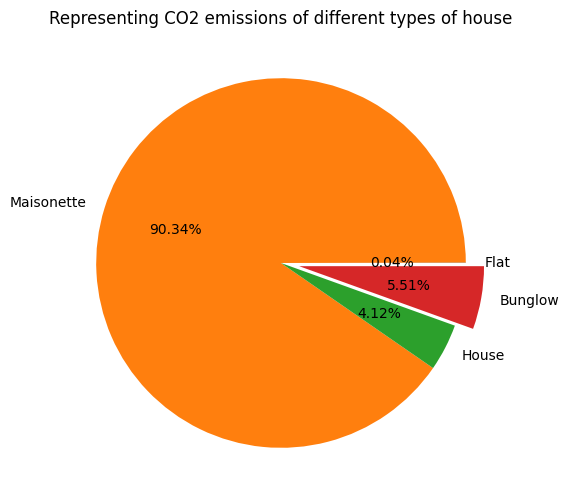

In [21]:
#pie chart of carbon emission per property type
labels = ['Flat', 'Maisonette', 'House', 'Bunglow']
plt.figure(figsize=(12, 6))
explode = [0, 0, 0, 0.1] 
plt.pie(property_type['C02_EMISSIONS_CURRENT'], labels=labels, explode=explode, autopct='%1.2f%%')
plt.title('Representing CO2 emissions of different types of house')
#plt.subplots_adjust(left=0.4, right=0.6, top=0.8, bottom=0.2)
plt.show()

#### Chart Having CO2 Emissions and CO2 emission Potential between property type

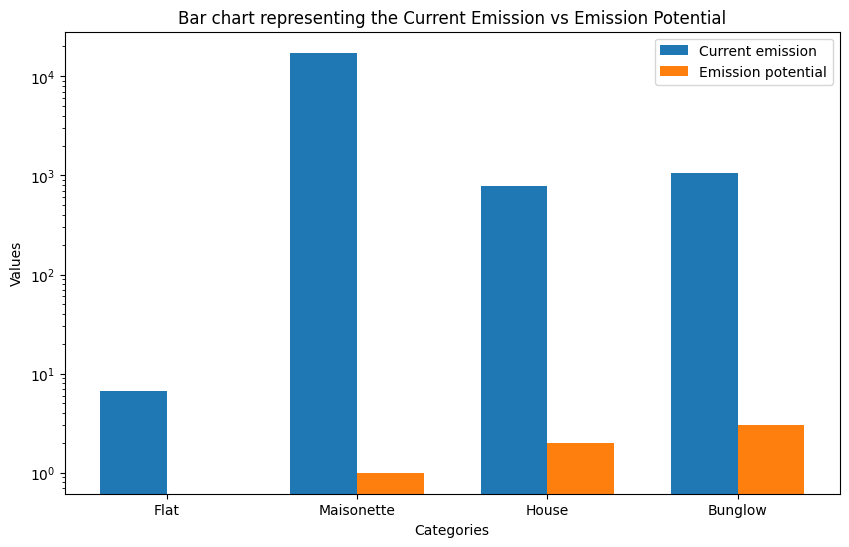

In [22]:
# CO2_EMISSIONS_CURRENT, CO2_EMISSIONS_POTENTIAL between property type
#dual bar chart having co2 emissions and co2 emission type between property type
labels = ['Flat', 'Maisonette', 'House', 'Bunglow']
width = 0.35  # Width of each bar

# Create a figure and axis
#fig, ax = plt.subplots()

# Set the positions for the bars
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the bars for the first set of data
bars1 = ax.bar(x - width/2, property_type['C02_EMISSIONS_CURRENT'], width, label='Current emission')

# Plot the bars for the second set of data
bars2 = ax.bar(x + width/2, property_type['CO2_EMISSIONS_POTENTIAL'], width, label='Emission potential')
ax.set_yscale('log')  # Set logarithmic scale for the y-axis
# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar chart representing the Current Emission vs Emission Potential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

#### Property Built type impact on the environment

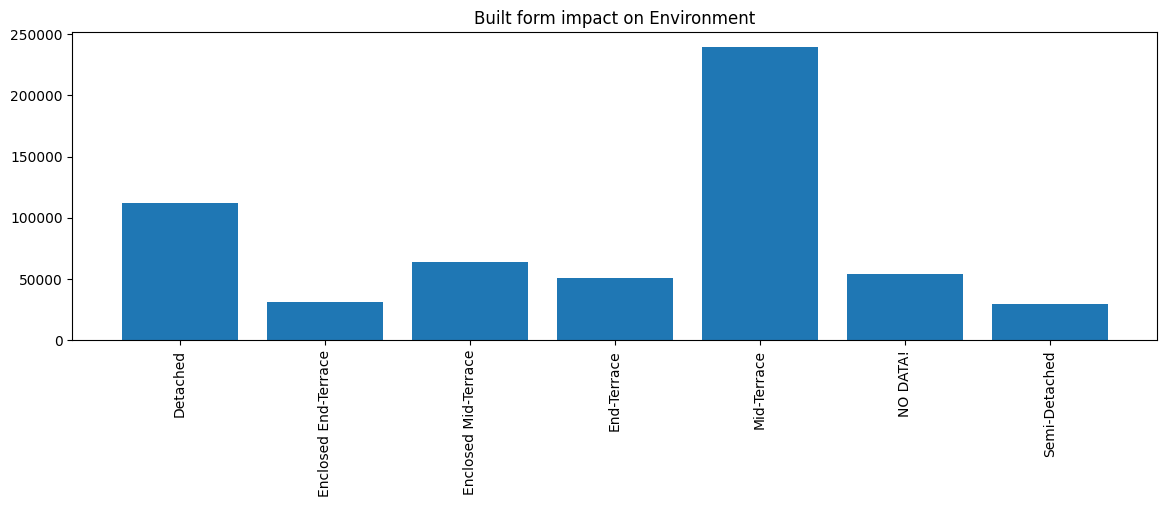

In [23]:
# built type vs environment (ENVIRONMENT_IMPACT_CURRENT)
#built_type_group
data_certificate['ENVIRONMENT_IMPACT_CURRENT'] = data_certificate['ENVIRONMENT_IMPACT_CURRENT'].astype('int')
#data_certificate['ENVIRONMENT_IMPACT_CURRENT']
plt.figure(figsize = (14, 4))
built_type_group = data_certificate.groupby('BUILT_FORM')['ENVIRONMENT_IMPACT_CURRENT'].sum().reset_index()
plt.bar(built_type_group['BUILT_FORM'], built_type_group['ENVIRONMENT_IMPACT_CURRENT'])
plt.xticks(rotation='vertical')
plt.title("Built form impact on Environment")
plt.show()

#### Energy type per built form

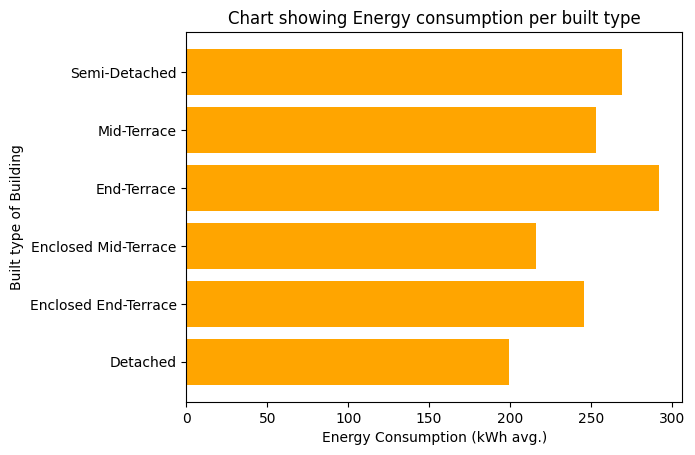

In [125]:
#TRANSACTION_TYPE AND ENERGY_CONSUMPTION
data_certificate['ENERGY_CONSUMPTION_CURRENT'] = data_certificate['ENERGY_CONSUMPTION_CURRENT'].astype('int')
group_consumption = data_certificate.groupby('BUILT_FORM')['ENERGY_CONSUMPTION_CURRENT'].mean().reset_index()
#group_consumption[group_consumption['BUILT_FORM'] == 'NO DATA!']
group_consumption.drop(group_consumption.index[5], inplace=True)
plt.barh(group_consumption['BUILT_FORM'], group_consumption['ENERGY_CONSUMPTION_CURRENT'], color='orange')
plt.title('Chart showing Energy consumption per built type')
plt.xlabel('Energy Consumption (kWh avg.)')
plt.ylabel('Built type of Building')
plt.show()

#### Sample data of wall description with windows energy

In [73]:
pd.set_option('display.max_colwidth', None)
data_certificate.groupby('WALLS_DESCRIPTION')['WINDOWS_ENERGY_EFF'].count().reset_index().sample(10)

,WALLS_DESCRIPTION,WINDOWS_ENERGY_EFF
89,Average thermal transmittance 0.61 W/m-¦K,3
174,"Sandstone, as built, insulated (assumed)",1
21,Average thermal transmittance 0.20 W/m-¦K,189
34,Average thermal transmittance 0.26 W/m-¦K,39
42,Average thermal transmittance 0.29 W/m-¦K,29
39,Average thermal transmittance 0.28 W/m-¦K,17
111,Average thermal transmittance 0.80 W/m+é-¦K,1
178,"Solid brick, as built, no insulation (assumed)",1580
116,Average thermal transmittance 0.92 W/m+é-¦K,2
130,Average thermal transmittance 1.38 W/m?K,1


- Window Energy Efficiency

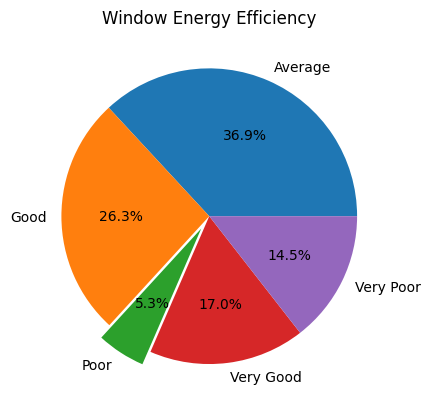

In [26]:
#data_certificate[['WALLS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF']].reset_index()
wall_data = data_certificate.groupby('WINDOWS_ENV_EFF')['WINDOWS_ENERGY_EFF'].count().reset_index()
label = list(wall_data['WINDOWS_ENV_EFF'])
explode = [0, 0, 0.1, 0, 0]
plt.pie(wall_data['WINDOWS_ENERGY_EFF'], labels=label, autopct='%1.1f%%', explode=explode)
plt.title("Window Energy Efficiency")
plt.show()

#### Energy impact potential with energy potential

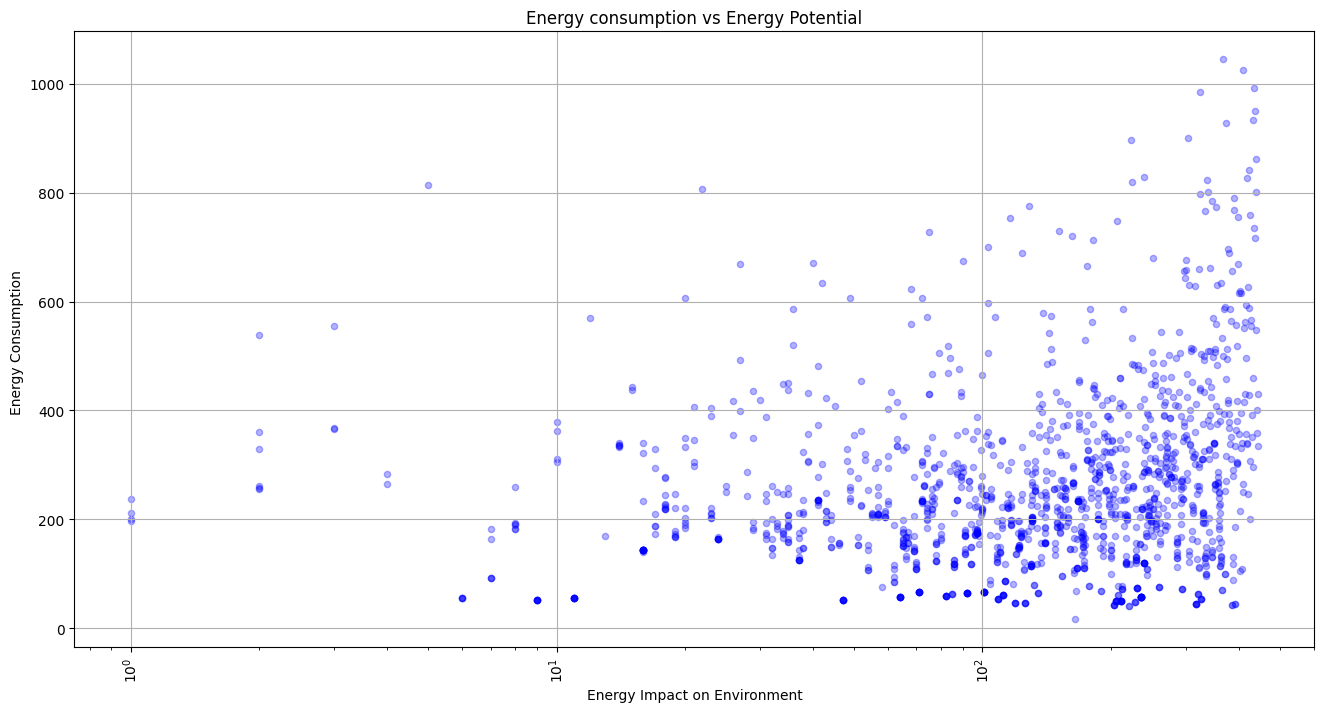

In [65]:
#energy impact potential vs energy impact potential scatter plot
plt.figure(figsize=(16, 8))
energy_impact = data_certificate['ENERGY_CONSUMPTION_CURRENT'].head(1500)
energy_potential = data_certificate['ENERGY_CONSUMPTION_POTENTIAL'].head(1500)
plt.scatter(energy_potential, energy_impact, color='blue', alpha=0.3, s=20)
plt.xscale('log')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.title("Energy consumption vs Energy Potential")
plt.xlabel("Energy Impact on Environment")
plt.ylabel("Energy Consumption ")
plt.show()

#### Findings

- Direction of Relationship: There appears to be a positive correlation between energy potential and energy consumption. As energy potential increases, energy consumption tends to increase as well.

- Strength of Relationship: The relationship between energy potential and energy consumption is moderately strong. Although there is some variability in the data points, they generally follow a discernible upward trend.

## Linear Regression Analysis

- Model to predict the CO2 emission based on input Energy Emission

Mean Squared Error: 1.4497004884877072




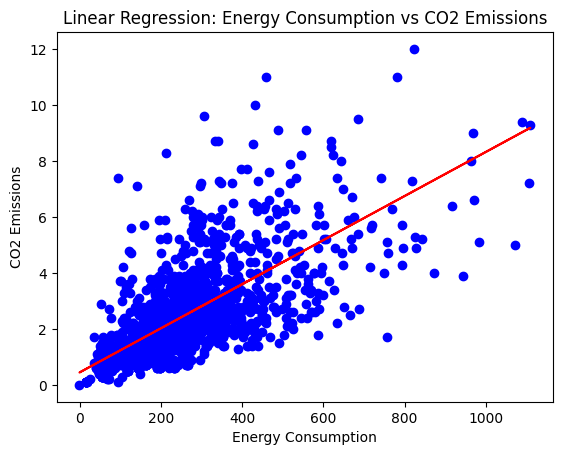

In [91]:
# Prepare the data
X = data_certificate['ENERGY_CONSUMPTION_CURRENT']  # Features (energy consumption)
y = data_certificate['C02_EMISSIONS_CURRENT'] # Target variable (CO2 emissions)
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('\n')
# Visualization
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Energy Consumption')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression: Energy Consumption vs CO2 Emissions')
plt.show()


- Function that'll take input of energy consumption and will display the predicted co2 output based on it.

In [88]:
def predict_co2_emissions():
    energy_consumption = float(input("Enter the energy consumption: "))
    # Reshape the user input to match the shape expected by the model (2D array with one column)
    energy_consumption_2d = np.array(energy_consumption).reshape(1, -1)
    predicted_co2_emissions = model.predict(energy_consumption_2d)
    print("Predicted CO2 emissions:", predicted_co2_emissions[0])

# Call the function to get user input and make predictions
predict_co2_emissions()

Enter the energy consumption:  200


Predicted CO2 emissions: [2.02486204]


# Report Generation

- Total number of Data
- Total Number of Property Type
- Average Emission per property type
- Most carbon emission building type
- House with most carbon emission


In [116]:
total_data = len(data_certificate)
total_property_type = average_property['PROPERTY_TYPE'].count()
average_emission = average_property['C02_EMISSIONS_CURRENT'].mean()
most_emission = average_property['PROPERTY_TYPE'].sort_values().head(1)[0]
house_emission = data_certificate[['Full-Address', 'C02_EMISSIONS_CURRENT']].sort_values(by='C02_EMISSIONS_CURRENT').head(1)['Full-Address']

# Create a DataFrame for the summary report
summary_report = pd.DataFrame({
    'Total Data': [total_data],
    'Total Properties': [total_property_type],
    'Average emissoin': [average_emission],
    'Property with most emission': [most_emission],
    'House with most emission': [house_emission]
})
summary_report.to_csv('summary_report.csv', index=False)


- Reading the report data from the above generated report

In [117]:
# reading the csv to show the dataset
data = pd.read_csv('summary_report.csv')
data

,Total Data,Total Properties,Average emissoin,Property with most emission,House with most emission
0,8229,4,3.76515,Bungalow,"4471 Apartment 6 21-22 Lovat Lane \nName: Full-Address, dtype: object"
